In [1]:
import numpy as np
import pandas as pd

In [2]:
adb = pd.read_csv('advertising.csv')

In [3]:
adb.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adb.shape

(200, 4)

In [5]:
adb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
adb.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

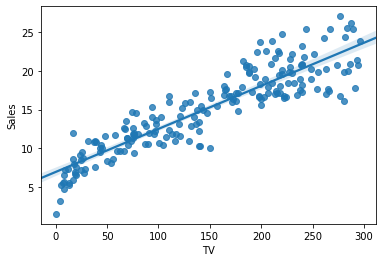

In [8]:
sns.regplot(x='TV', y='Sales' , data=adb)

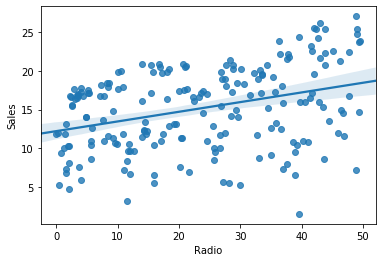

In [9]:
sns.regplot(x='Radio', y='Sales' , data=adb)

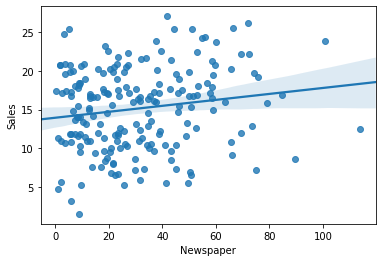

In [10]:
sns.regplot(x='Newspaper', y='Sales' , data=adb)

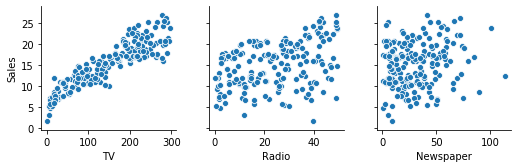

In [11]:
sns.pairplot(x_vars=['TV', 'Radio' , 'Newspaper'] , y_vars='Sales' , data=adb)

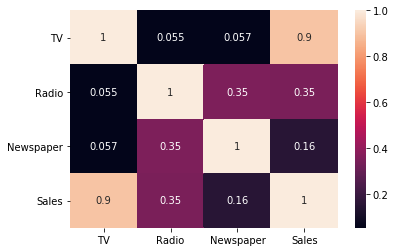

In [12]:
sns.heatmap(adb.corr() , annot=True)

In [13]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
# Labeling x & y
X = adb['TV']
y = adb['Sales']

In [15]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.70 , random_state = 100)
y_test.shape

(60,)

In [16]:
# Training Model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\Users\dines\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
# fitting model
lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        21:36:03   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

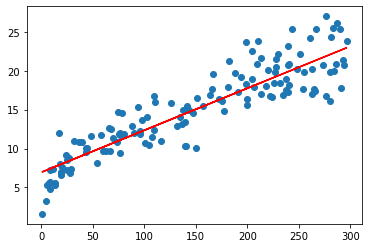

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train , 6.9487+0.054*X_train , 'r')

In [19]:
y_train_pred = lr_model.predict(X_train_sm)

In [20]:
res = y_train-y_train_pred

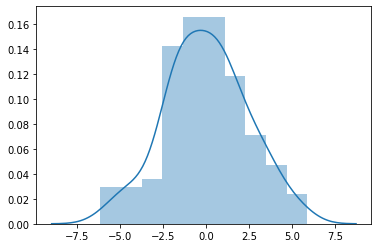

In [21]:
# Plotting Residual
plt.figure()
sns.distplot(res)

<function matplotlib.pyplot.show(*args, **kw)>

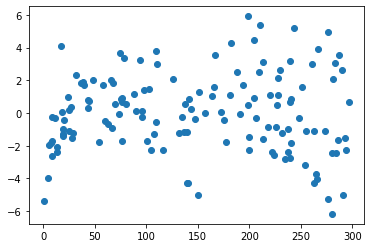

In [22]:
plt.scatter(X_train,res)
plt.show

In [23]:
X_test_sm = sm.add_constant(X_test) 
y_test_pred = lr_model.predict(X_test_sm)

In [25]:
# Evaluting Model
# R Sq
r2 = r2_score(y_true=y_test , y_pred=y_test_pred)
r2

0.7921031601245659

In [27]:
# r2 on train
r2_score(y_true=y_train , y_pred=y_train_pred)

0.8157933136480389

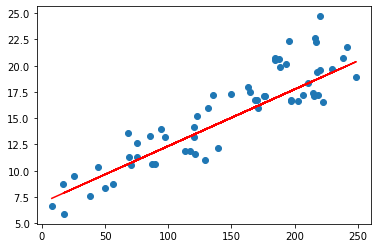

In [28]:
# Test Pred
plt.scatter(X_test,y_test)
plt.plot(X_test , 6.9487+0.054*X_test , 'r')